In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
passes_summary = pd.read_pickle("passes.pkl")
tracking_data = pd.read_pickle('tracking_data_full.pkl')

Drehe Pässe von zweiter Halbzeit um, damit home_team immer von links nach rechts spielt.

In [29]:
mask = passes_summary['PERIOD'] == 2
passes_summary.loc[mask, ['start_X', 'end_X']] *= -1
passes_summary.loc[mask, ['start_Y', 'end_Y']] *= -1
mask = tracking_data['PERIOD'] == 2
tracking_data.loc[mask, ['X']] *= -1
tracking_data.loc[mask, ['Y']] *= -1

In [30]:
passes_summary

,motion_number,start_X,start_Y,end_X,end_Y,PERIOD,POSSESSION_GROUP_start,POSSESSION_GROUP_end,FRAME_START,FRAME_END,POSSESSION_TRACKABLE_OBJECT,Angekommen,Passgeber,Passempfänger,überspielte Verteidiger,Score,Torschuss
0,1,-0.59,1.84,-13.07,10.93,1.0,away team,away team,95,112,28566,True,28566.0,24372.0,0,0.000000,False
1,2,-13.24,13.54,-3.90,28.36,1.0,away team,away team,117,131,24372,True,24372.0,39023.0,1,6.087529,False
2,3,1.99,31.32,-8.89,29.12,1.0,home team,home team,171,188,<NA>,True,16427.0,16471.0,0,6.354547,False
3,4,-6.60,24.64,8.48,26.09,1.0,away team,away team,233,241,<NA>,True,24372.0,28566.0,1,6.929556,False
4,5,8.95,31.28,18.22,23.76,1.0,away team,home team,259,268,<NA>,False,39023.0,39015.0,2,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,0.53,19.75,-3.27,20.59,2.0,away team,away team,57105,57112,<NA>,True,39023.0,39023.0,0,0.000000,False
836,837,-6.68,20.79,11.24,32.42,2.0,away team,away team,57136,57162,<NA>,True,39023.0,39023.0,0,7.235226,False
837,838,26.85,21.97,32.17,1.23,2.0,away team,away team,57325,57349,<NA>,True,14926.0,29957.0,1,5.996849,False
838,839,32.55,-0.98,21.53,21.72,2.0,away team,away team,57355,57364,<NA>,True,29957.0,39023.0,0,0.000000,False


Filtere Pässe in den Strafraum des Heimteams, die erfolgreich waren

In [61]:
strafraum_pass_home = passes_summary[((passes_summary['start_X'] >= -36.5) | (passes_summary['start_Y'].abs() > 20))    #Pass von außerhab des Strafraums
                                     & (passes_summary['end_X'] <= -36.5) & (passes_summary['end_Y'].abs() < 20)        #in den Strafraum
                                     & (passes_summary['POSSESSION_GROUP_start'] == "home team")
                                     & (passes_summary['Passempfänger'] != passes_summary['Passgeber'])] 


In [62]:
def visualize_passes(passes_summary, motion_numbers, show_player = False, title = 'Pass'):
    pass_sequence = passes_summary[passes_summary['motion_number'].isin(motion_numbers)]
    
    plt.figure(figsize=(10, 7))
    plt.title(title)

    plt.plot([-52.5, 52.5, 52.5, -52.5, -52.5], [-34, -34, 34, 34, -34], color="white")
    plt.gca().set_facecolor("green")
    plt.xlim(-55, 55)
    plt.ylim(-35, 35)

    for _, row in pass_sequence.iterrows():
        color = 'blue' if row['Angekommen'] else 'red'
        dx = row['end_X'] - row['start_X']
        dy = row['end_Y'] - row['start_Y']

        plt.quiver(
            row['start_X'], row['start_Y'],  # Startpunkt
            dx, dy,                          # Richtungsvektor
            angles='xy',
            scale_units='xy',
            scale=1,
            color=color,
            width=0.003,
            headwidth=3,
            headlength=5
        )        

    plt.show()

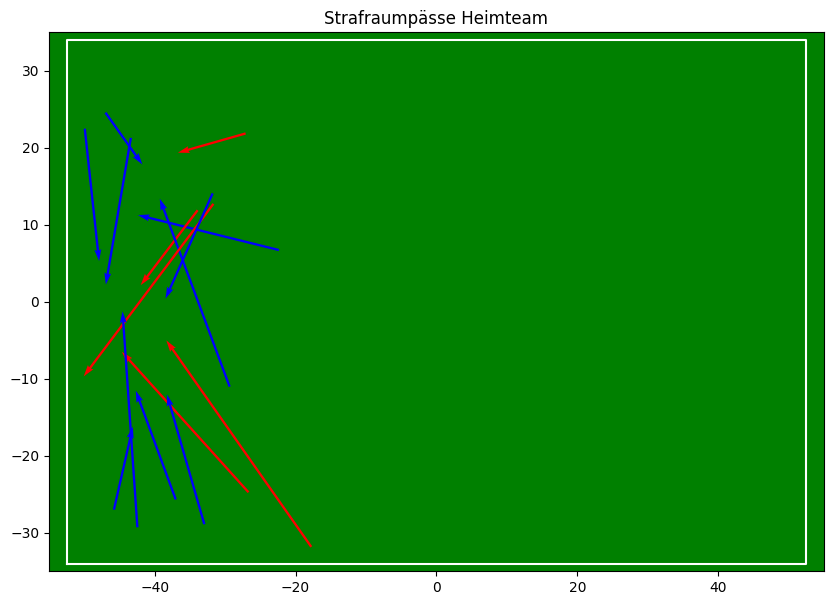

In [63]:
visualize_passes(passes_summary, strafraum_pass_home['motion_number'], title = "Strafraumpässe Heimteam")

In [64]:
strafraum_pass_away = passes_summary[((passes_summary['start_X'] <= 36.5) | (passes_summary['start_Y'].abs() > 20)) 
                                     & (passes_summary['end_X'] >= 36.5) & (passes_summary['end_Y'].abs() < 20) 
                                     & (passes_summary['POSSESSION_GROUP_start'] == "away team")]

In [65]:
strafraum_pass_home

,motion_number,start_X,start_Y,end_X,end_Y,PERIOD,POSSESSION_GROUP_start,POSSESSION_GROUP_end,FRAME_START,FRAME_END,POSSESSION_TRACKABLE_OBJECT,Angekommen,Passgeber,Passempfänger,überspielte Verteidiger,Score,Torschuss
59,60,-45.78,-27.00,-43.10,-16.23,1.0,home team,home team,3842,3853,28437,True,28437.0,28546.0,0,0.000000,False
67,68,-22.37,6.72,-42.37,11.26,1.0,home team,home team,4174,4198,28547,True,28547.0,16427.0,0,8.341687,False
75,76,-26.68,-24.74,-44.65,-6.50,1.0,home team,away team,5282,5297,<NA>,False,28437.0,16663.0,0,0.000000,False
192,193,-33.90,11.89,-41.98,2.16,1.0,home team,NaN,12356,12367,<NA>,False,16641.0,28546.0,4,0.000000,False
211,212,-37.01,-25.68,-42.68,-11.55,1.0,home team,home team,13641,13652,<NA>,True,29942.0,28437.0,0,6.107966,False
267,268,-29.36,-11.02,-39.27,13.39,1.0,home team,home team,16803,16821,16471,True,16471.0,16641.0,2,7.090634,False
279,280,-31.66,12.72,-50.07,-9.69,1.0,home team,away team,17422,17438,<NA>,False,28437.0,28565.0,7,0.000000,True
320,321,-17.77,-31.83,-38.34,-5.02,1.0,home team,NaN,20893,20911,<NA>,False,29942.0,16663.0,6,0.000000,False
333,334,-27.09,21.86,-36.70,19.36,1.0,home team,away team,21479,21490,28547,False,28547.0,28555.0,2,0.000000,False
417,418,-31.77,14.08,-38.46,0.41,1.0,home team,home team,26876,26885,<NA>,True,16641.0,16427.0,2,6.397552,False


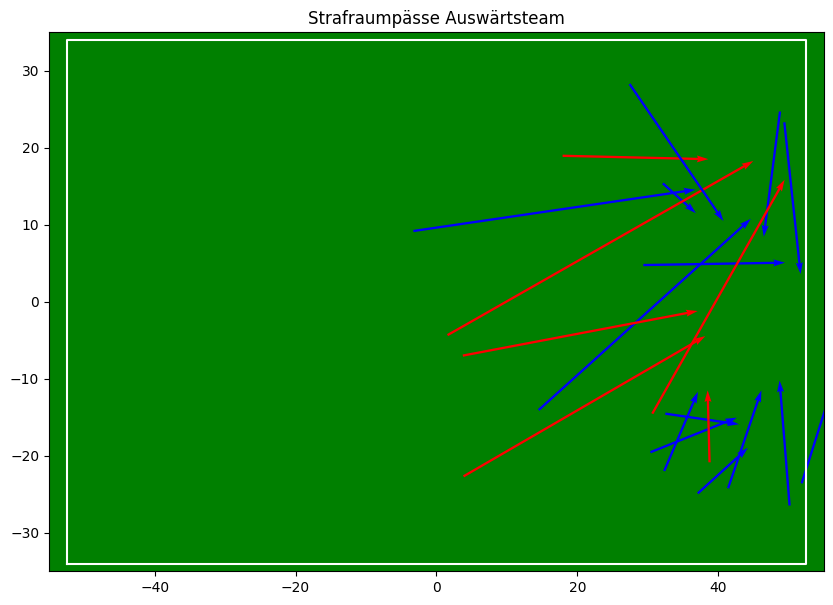

In [66]:
visualize_passes(passes_summary, strafraum_pass_away['motion_number'], title = "Strafraumpässe Auswärtsteam")

In [67]:
def zweier_sequenzen(motion_numbers, plot_pre_pass = False ,plot_laufweg_passempfänger = False, team = 'heim'):
    plt.figure(figsize=(10, 7))
    if team == 'heim':
        plt.title('Strafraumaktionen - Heim')
    else:
        plt.title('Strafraumaktionen - Gast')


    plt.plot([-52.5, 52.5, 52.5, -52.5, -52.5], [-34, -34, 34, 34, -34], color="white")
    plt.gca().set_facecolor("green")
    plt.xlim(-55, 55)
    plt.ylim(-35, 35)
    for motion_number in motion_numbers:
        pass_strafraum = passes_summary[passes_summary['motion_number'] == motion_number].iloc[0]
        pre_pass = passes_summary[passes_summary['motion_number'] == motion_number-1].iloc[0]
        #Pass in den Strafraum
        color = 'blue' if pass_strafraum['Angekommen'] else 'red'
        dx = pass_strafraum['end_X'] - pass_strafraum['start_X']
        dy = pass_strafraum['end_Y'] - pass_strafraum['start_Y']

        plt.quiver(
                    pass_strafraum['start_X'], pass_strafraum['start_Y'],  # Startpunkt
                    dx, dy,                          # Richtungsvektor
                    angles='xy',
                    scale_units='xy',
                    scale=1,
                    color=color,
                    width=0.003,
                    headwidth=3,
                    headlength=5
                )
        #Pre-Pass 
        if plot_pre_pass:
            color = 'blue' if pre_pass['Angekommen'] else 'red'
            dx = pre_pass['end_X'] - pre_pass['start_X']
            dy = pre_pass['end_Y'] - pre_pass['start_Y']

            plt.quiver(
                        pre_pass['start_X'], pre_pass['start_Y'],  # Startpunkt
                        dx, dy,                          # Richtungsvektor
                        angles='xy',
                        scale_units='xy',
                        scale=1,
                        color=color,
                        width=0.003,
                        headwidth=3,
                        headlength=5,
                        alpha = 0.5
                    )
            #Laufweg
            dx = pass_strafraum['start_X'] - pre_pass['end_X']
            dy = pass_strafraum['start_Y'] - pre_pass['end_Y']
            plt.quiver(
                        pre_pass['end_X'], pre_pass['end_Y'],  # Startpunkt
                        dx, dy,                          # Richtungsvektor
                        angles='xy',
                        scale_units='xy',
                        scale=1,
                        color='cyan',
                        width=0.003,
                        headwidth=3,
                        headlength=5
                    )
        #Laufweg des Passempängers

        if plot_laufweg_passempfänger:        
            passempfänger = pass_strafraum['Passempfänger']
            color = 'orange'

            start_position = tracking_data[(tracking_data['FRAME'] == pass_strafraum['FRAME_START']-50) & (tracking_data['TRACK_ID'] == passempfänger)].iloc[0]
            

            dx = pass_strafraum['end_X'] - start_position['X']
            dy = pass_strafraum['end_Y'] - start_position['Y']


            plt.quiver(
                        start_position['X'], start_position['Y'],  # Startpunkt
                        dx, dy,                          # Richtungsvektor
                        angles='xy',
                        scale_units='xy',
                        scale=1,
                        color=color,
                        width=0.003,
                        headwidth=3,
                        headlength=5
                    )

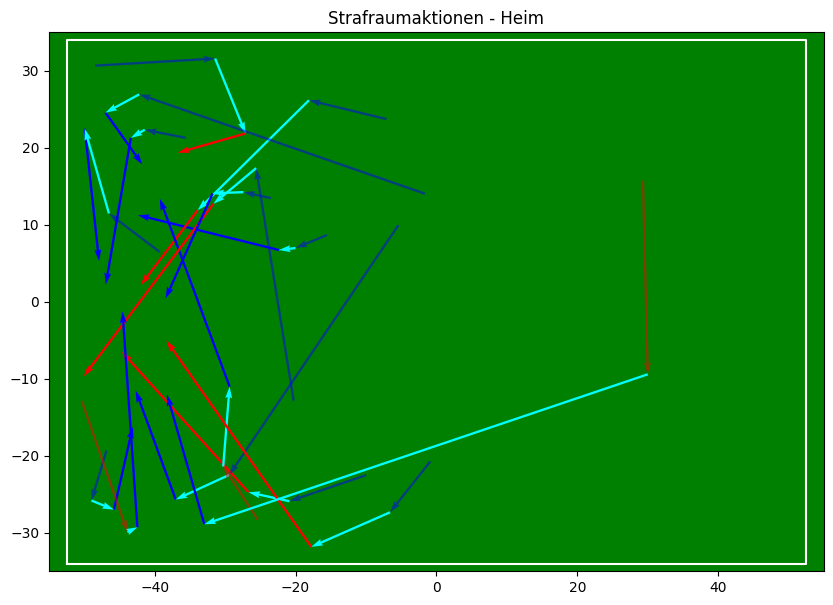

In [68]:
strafraum_pass_numbers_home = strafraum_pass_home['motion_number']
zweier_sequenzen(motion_numbers = strafraum_pass_numbers_home, plot_pre_pass = True, team = 'heim')

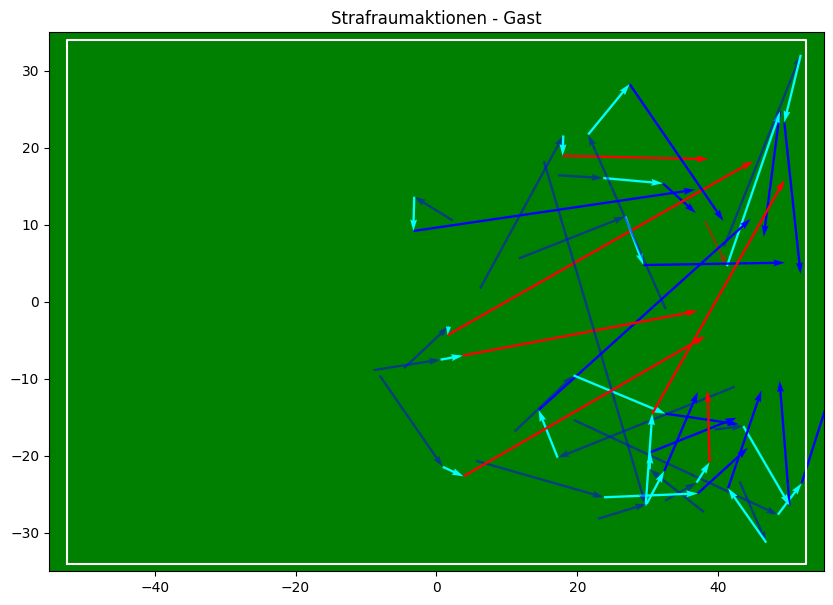

In [69]:
strafraum_pass_numbers_away = strafraum_pass_away['motion_number']
zweier_sequenzen(motion_numbers = strafraum_pass_numbers_away, plot_pre_pass=True, team = 'gast')

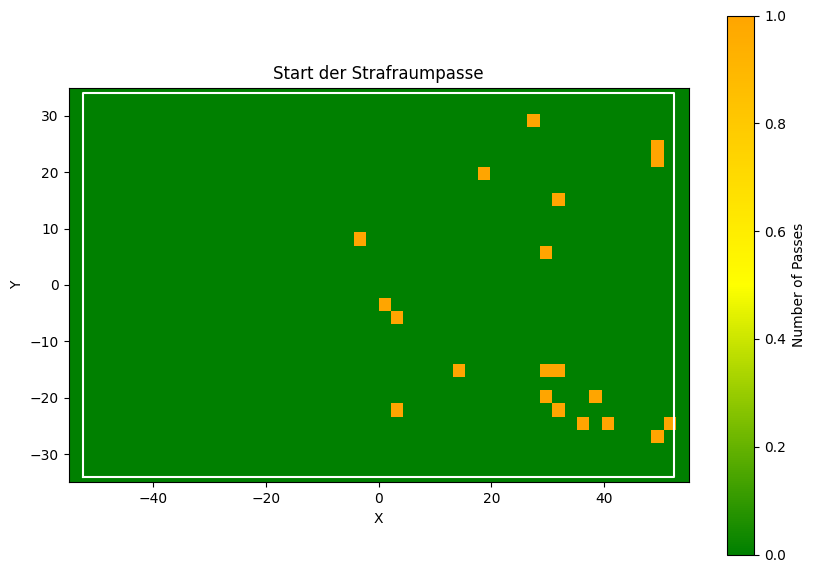

In [70]:
from matplotlib.colors import LinearSegmentedColormap

green_red_cmap = LinearSegmentedColormap.from_list("green_red", ["green", "yellow", "orange"])
plt.figure(figsize=(10, 7))
plt.title("Start der Strafraumpasse")

plt.plot([-52.5, 52.5, 52.5, -52.5, -52.5], [-34, -34, 34, 34, -34], color="white")
plt.xlim(-55, 55)
plt.ylim(-35, 35)
plt.gca().set_facecolor("green")

plt.hist2d(
    passes_summary[passes_summary['motion_number'].isin(strafraum_pass_numbers_away)]['start_X'],
    passes_summary[passes_summary['motion_number'].isin(strafraum_pass_numbers_away)]['start_Y'],
    bins=[50, 30],           # Anzahl der Bins in X und Y (quadratisch = gleiche Zahl)
    range=[[-55, 55], [-35, 35]],  # Spielfeldgrenzen
    cmap=green_red_cmap
)
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().set_aspect('equal')
plt.colorbar(label='Number of Passes')
plt.show()

### Welcher Spieler ist an 2er Pattern, die zu einer Strafraumaktion führt beteiligt?  
Mit mehr Daten: Welche Spielerkombinationen harmonieren besonders gut?

In [71]:
player_summary = pd.read_pickle('player_summary.pkl')

In [72]:
player_summary['Strafraumpässe'] = 0
player_summary['Pre-Strafraumpässe'] = 0
player_summary['Annahmen im Strafraum'] = 0

In [73]:
for _, row in strafraum_pass_home.iterrows():
    p = row['Passgeber']
    player_summary.loc[player_summary['Player'] == p, 'Strafraumpässe'] += 1
    p = row['Passempfänger']
    player_summary.loc[player_summary['Player'] == p, 'Annahmen im Strafraum'] += 1
for _, row in strafraum_pass_away.iterrows():
    p = row['Passgeber']
    player_summary.loc[player_summary['Player'] == p, 'Strafraumpässe'] += 1
    p = row['Passempfänger']
    player_summary.loc[player_summary['Player'] == p, 'Annahmen im Strafraum'] += 1

In [74]:
pre_pass_numbers_away = strafraum_pass_numbers_away - 1 
pre_pass_numbers_home = strafraum_pass_numbers_home - 1
pre_pass_home = passes_summary[passes_summary['motion_number'].isin(pre_pass_numbers_home)]
pre_pass_away = passes_summary[passes_summary['motion_number'].isin(pre_pass_numbers_away)]

In [75]:
for _, row in pre_pass_home.iterrows():
    p = row['Passgeber']
    player_summary.loc[player_summary['Player'] == p, 'Pre-Strafraumpässe'] += 1
for _, row in pre_pass_away.iterrows():
    p = row['Passgeber']
    player_summary.loc[player_summary['Player'] == p, 'Pre-Strafraumpässe'] += 1

In [76]:
player_summary

,Player,team,Pässe,Angekommene Pässe,Fehlpässe,Passquote,Überspielte Verteidiger,Average Pass Score,Startaufstellung,Einwechslung,Auswechslung,Position,Seite,Strafraumpässe,Pre-Strafraumpässe,Annahmen im Strafraum
0,28437,home team,30,24,6,0.800000,1,1.558548,True,00:00:00,01:10:26.9,Angriff,links,3,0,2
1,16471,home team,34,27,7,0.794118,14,3.158630,True,00:00:00,01:24:39.6,Angriff,zentral,1,2,2
2,28435,away team,19,16,3,0.842105,6,2.325255,True,00:00:00,01:34:36.2,Angriff,zentral,1,1,3
3,28566,away team,51,41,10,0.803922,23,2.933498,True,00:00:00,01:34:36.2,Mittelfeld,links,4,6,6
4,29957,away team,34,28,6,0.823529,4,2.078690,True,00:00:00,01:34:36.2,Angriff,rechts,4,4,3
5,29926,away team,38,32,6,0.842105,10,1.846291,True,00:00:00,01:08:32.9,Mittelfeld,rechts,1,0,0
6,61575,away team,33,31,2,0.939394,13,2.255370,True,00:00:00,00:54:30.1,Mittelfeld,links,1,0,0
7,28555,away team,64,55,9,0.859375,35,3.349324,True,00:00:00,01:08:32.9,Abwehr,zentral,2,2,1
8,39023,away team,57,52,5,0.912281,31,2.733226,True,00:00:00,01:34:36.2,Abwehr,links,1,0,1
9,28565,away team,36,31,5,0.861111,3,2.054287,True,00:00:00,01:34:36.2,Mittelfeld,rechts,4,3,2


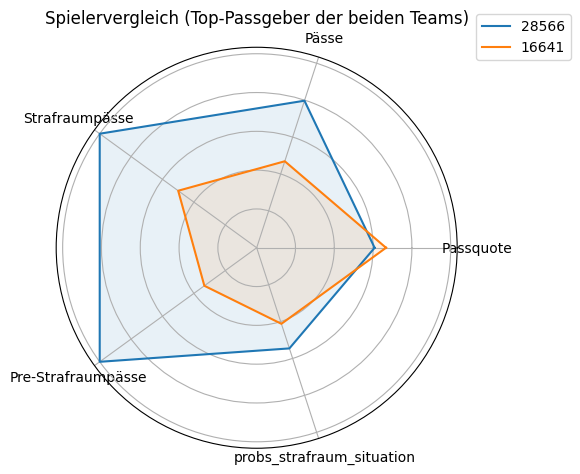

In [100]:
from math import pi
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
import pandas as pd

def radar_chart(df, player_ids):
    stats = ['Passquote',  'Pässe', 'Strafraumpässe', 'Pre-Strafraumpässe', 'probs_strafraum_situation']
    
    df_norm = df.copy()
    for stat in stats:
        min_val = df[stat].min()
        max_val = df[stat].max()
        df_norm[stat] = (df[stat] - min_val) / (max_val - min_val)

    angles = [n / float(len(stats)) * 2 * pi for n in range(len(stats))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for pid in player_ids:
        row = df_norm[df['Player'] == pid]
        values = row[stats].values.flatten().tolist()
        values += values[:1]
        label = df[df['Player'] == pid]['Player'].values[0]
        ax.plot(angles, values, label=f"{label}")
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(stats)
    ax.set_title("Spielervergleich (Top-Passgeber der beiden Teams)")
    ax.set_yticklabels([])
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

radar_chart(player_summary, [28566, 16641])


## Laufweg des Passempfängers
Welchen Weg läuft der Passempfänger 5 Sekunden bevor der Pass gespielt wird bis zur Ballannahme ?

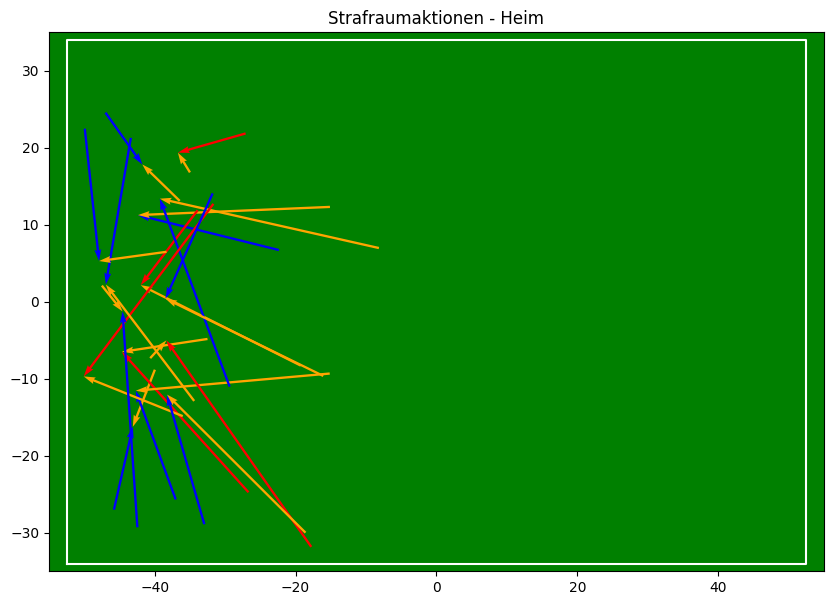

In [86]:
zweier_sequenzen(strafraum_pass_numbers_home, plot_laufweg_passempfänger=True, team = 'heim')

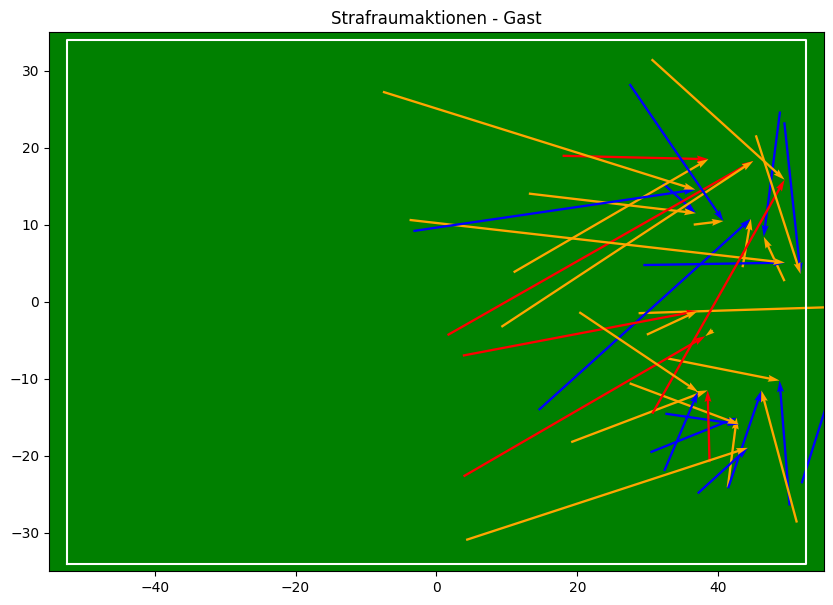

In [79]:
zweier_sequenzen(strafraum_pass_numbers_away, plot_laufweg_passempfänger=True, team = 'gast')

In [87]:
passes_summary

,motion_number,start_X,start_Y,end_X,end_Y,PERIOD,POSSESSION_GROUP_start,POSSESSION_GROUP_end,FRAME_START,FRAME_END,POSSESSION_TRACKABLE_OBJECT,Angekommen,Passgeber,Passempfänger,überspielte Verteidiger,Score,Torschuss
0,1,-0.59,1.84,-13.07,10.93,1.0,away team,away team,95,112,28566,True,28566.0,24372.0,0,0.000000,False
1,2,-13.24,13.54,-3.90,28.36,1.0,away team,away team,117,131,24372,True,24372.0,39023.0,1,6.087529,False
2,3,1.99,31.32,-8.89,29.12,1.0,home team,home team,171,188,<NA>,True,16427.0,16471.0,0,6.354547,False
3,4,-6.60,24.64,8.48,26.09,1.0,away team,away team,233,241,<NA>,True,24372.0,28566.0,1,6.929556,False
4,5,8.95,31.28,18.22,23.76,1.0,away team,home team,259,268,<NA>,False,39023.0,39015.0,2,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,0.53,19.75,-3.27,20.59,2.0,away team,away team,57105,57112,<NA>,True,39023.0,39023.0,0,0.000000,False
836,837,-6.68,20.79,11.24,32.42,2.0,away team,away team,57136,57162,<NA>,True,39023.0,39023.0,0,7.235226,False
837,838,26.85,21.97,32.17,1.23,2.0,away team,away team,57325,57349,<NA>,True,14926.0,29957.0,1,5.996849,False
838,839,32.55,-0.98,21.53,21.72,2.0,away team,away team,57355,57364,<NA>,True,29957.0,39023.0,0,0.000000,False


In [88]:
strafraum_pass_numbers_away

72      73
128    129
130    131
132    133
179    180
181    182
224    225
252    253
294    295
372    373
456    457
506    507
547    548
714    715
744    745
747    748
783    784
809    810
829    830
839    840
Name: motion_number, dtype: int64

In [93]:
def probs_in_next_3_passes_strafraum(row):
    team = row['POSSESSION_GROUP_start']
    if team == 'away team':
        strafraum_pass_numbers = strafraum_pass_numbers_away
    else:
        strafraum_pass_numbers = strafraum_pass_numbers_home
    if (row['motion_number'] in strafraum_pass_numbers.values) or (row['motion_number']+1 in strafraum_pass_numbers.values) or (row['motion_number'] + 2 in strafraum_pass_numbers.values):
        return 1
    
    else:
        return 0

passes_summary['probs_in_next_3_passes_strafraum'] = passes_summary.apply(probs_in_next_3_passes_strafraum, axis=1)

In [94]:
passes_summary

,motion_number,start_X,start_Y,end_X,end_Y,PERIOD,POSSESSION_GROUP_start,POSSESSION_GROUP_end,FRAME_START,FRAME_END,POSSESSION_TRACKABLE_OBJECT,Angekommen,Passgeber,Passempfänger,überspielte Verteidiger,Score,Torschuss,probs_in_next_3_passes_strafraum
0,1,-0.59,1.84,-13.07,10.93,1.0,away team,away team,95,112,28566,True,28566.0,24372.0,0,0.000000,False,0
1,2,-13.24,13.54,-3.90,28.36,1.0,away team,away team,117,131,24372,True,24372.0,39023.0,1,6.087529,False,0
2,3,1.99,31.32,-8.89,29.12,1.0,home team,home team,171,188,<NA>,True,16427.0,16471.0,0,6.354547,False,0
3,4,-6.60,24.64,8.48,26.09,1.0,away team,away team,233,241,<NA>,True,24372.0,28566.0,1,6.929556,False,0
4,5,8.95,31.28,18.22,23.76,1.0,away team,home team,259,268,<NA>,False,39023.0,39015.0,2,0.000000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,0.53,19.75,-3.27,20.59,2.0,away team,away team,57105,57112,<NA>,True,39023.0,39023.0,0,0.000000,False,0
836,837,-6.68,20.79,11.24,32.42,2.0,away team,away team,57136,57162,<NA>,True,39023.0,39023.0,0,7.235226,False,0
837,838,26.85,21.97,32.17,1.23,2.0,away team,away team,57325,57349,<NA>,True,14926.0,29957.0,1,5.996849,False,1
838,839,32.55,-0.98,21.53,21.72,2.0,away team,away team,57355,57364,<NA>,True,29957.0,39023.0,0,0.000000,False,1


In [95]:
player_summary['probs_strafraum_situation'] = player_summary.apply(lambda row: passes_summary[(passes_summary['Passgeber'] == row['Player'])]['probs_in_next_3_passes_strafraum'].sum()/row['Pässe'] , axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_330768\761616957.py:1: RuntimeWarning: invalid value encountered in scalar divide
  player_summary['probs_strafraum_situation'] = player_summary.apply(lambda row: passes_summary[(passes_summary['Passgeber'] == row['Player'])]['probs_in_next_3_passes_strafraum'].sum()/row['Pässe'] , axis=1)


In [96]:
player_summary

,Player,team,Pässe,Angekommene Pässe,Fehlpässe,Passquote,Überspielte Verteidiger,Average Pass Score,Startaufstellung,Einwechslung,Auswechslung,Position,Seite,Strafraumpässe,Pre-Strafraumpässe,Annahmen im Strafraum,probs_strafraum_situation
0,28437,home team,30,24,6,0.800000,1,1.558548,True,00:00:00,01:10:26.9,Angriff,links,3,0,2,0.100000
1,16471,home team,34,27,7,0.794118,14,3.158630,True,00:00:00,01:24:39.6,Angriff,zentral,1,2,2,0.176471
2,28435,away team,19,16,3,0.842105,6,2.325255,True,00:00:00,01:34:36.2,Angriff,zentral,1,1,3,0.157895
3,28566,away team,51,41,10,0.803922,23,2.933498,True,00:00:00,01:34:36.2,Mittelfeld,links,4,6,6,0.176471
4,29957,away team,34,28,6,0.823529,4,2.078690,True,00:00:00,01:34:36.2,Angriff,rechts,4,4,3,0.323529
5,29926,away team,38,32,6,0.842105,10,1.846291,True,00:00:00,01:08:32.9,Mittelfeld,rechts,1,0,0,0.052632
6,61575,away team,33,31,2,0.939394,13,2.255370,True,00:00:00,00:54:30.1,Mittelfeld,links,1,0,0,0.030303
7,28555,away team,64,55,9,0.859375,35,3.349324,True,00:00:00,01:08:32.9,Abwehr,zentral,2,2,1,0.125000
8,39023,away team,57,52,5,0.912281,31,2.733226,True,00:00:00,01:34:36.2,Abwehr,links,1,0,1,0.070175
9,28565,away team,36,31,5,0.861111,3,2.054287,True,00:00:00,01:34:36.2,Mittelfeld,rechts,4,3,2,0.166667
